# Web Scraping/Data Wrangling

In [2]:
!pip install selenium

In [4]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9686 sha256=1bb2248d1f49c92f66a2a5e25e31caa9f9cbc38226e55b8733018507669bee7a
  Stored in directory: c:\users\yuvem\appdata\local\pip\cache\wheels\bd\a8\c3\3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget


In [81]:
# Import selenium packages
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.support.wait import WebDriverWait

import numpy as np
import pandas as pd
import re
import os 
import wget

In [82]:
driver = webdriver.Chrome('C:/Users/yuvem/OneDrive/Desktop/chromedriver.exe')
driver.get('https://www.instagram.com/')

In [83]:
username = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.CSS_SELECTOR, "input[name='username']"))) # use WebDriverWait func; insert expected conditions into func .until(
password = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.CSS_SELECTOR, "input[name='password']"))) # Do the same thing for password

username.clear()
password.clear()
username.send_keys("yq_207")
password.send_keys("232427USH1MIGI03")

In [84]:
log_in = password = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.CSS_SELECTOR, "button[type='submit']"))).click()

In [85]:
not_now = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.XPATH, "//button[contains(text(), 'Not Now')]"))).click()
not_now2 = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.XPATH, "//button[contains(text(), 'Not Now')]"))).click()

In [86]:
searchbox = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.XPATH, "//input[@placeholder='Search']")))
searchbox.clear()
keyword = "#trendystyle"
searchbox.send_keys(keyword)

In [88]:
searchbox.send_keys(Keys.ENTER)

In [89]:
driver.execute_script("window.scrollTo(0,8000);")

images = driver.find_elements_by_tag_name('img')
images

[<selenium.webdriver.remote.webelement.WebElement (session="2b9e7f1e1f96b6b0e450b740cabdaf1f", element="0da28849-4200-4004-b24c-ccaf5960e164")>,
 <selenium.webdriver.remote.webelement.WebElement (session="2b9e7f1e1f96b6b0e450b740cabdaf1f", element="80327c83-b632-467a-a262-ddf6ba42b2b6")>,
 <selenium.webdriver.remote.webelement.WebElement (session="2b9e7f1e1f96b6b0e450b740cabdaf1f", element="4635268e-4ab9-44dc-b7d4-95fe75ea6941")>,
 <selenium.webdriver.remote.webelement.WebElement (session="2b9e7f1e1f96b6b0e450b740cabdaf1f", element="a8c9dca3-a903-4dc7-8271-33e2b004dd36")>,
 <selenium.webdriver.remote.webelement.WebElement (session="2b9e7f1e1f96b6b0e450b740cabdaf1f", element="e7533834-604b-40c4-9f51-d2a77a07e7d2")>,
 <selenium.webdriver.remote.webelement.WebElement (session="2b9e7f1e1f96b6b0e450b740cabdaf1f", element="68b31121-cf68-48cd-a9b4-06185fe44bb8")>,
 <selenium.webdriver.remote.webelement.WebElement (session="2b9e7f1e1f96b6b0e450b740cabdaf1f", element="2c14f568-f755-43ae-8dfe-b7

### Targeting source attribute of images

In [90]:
# Use list comprehensions
images = [image.get_attribute('src') for image in images]
images

['https://scontent-ort2-2.cdninstagram.com/v/t51.2885-15/e35/243345065_1029514424499996_5380816562392022491_n.jpg?_nc_ht=scontent-ort2-2.cdninstagram.com&_nc_cat=100&_nc_ohc=xGdMpzeKkbUAX9KDde9&edm=ABZsPhsBAAAA&ccb=7-4&oh=9a0cdfc2fa8d6e63467347866b7759b2&oe=616165CD&_nc_sid=4efc9f&ig_cache_key=MjY3MzYxNDk4OTg2NzMwMDY4Mg%3D%3D.2-ccb7-4',
 'https://scontent-ort2-2.cdninstagram.com/v/t51.2885-15/e35/243345065_1029514424499996_5380816562392022491_n.jpg?_nc_ht=scontent-ort2-2.cdninstagram.com&_nc_cat=100&_nc_ohc=xGdMpzeKkbUAX9KDde9&edm=ABZsPhsBAAAA&ccb=7-4&oh=9a0cdfc2fa8d6e63467347866b7759b2&oe=616165CD&_nc_sid=4efc9f&ig_cache_key=MjY3MzYxNDk4OTg2NzMwMDY4Mg%3D%3D.2-ccb7-4',
 'https://scontent-ort2-2.cdninstagram.com/v/t51.2885-15/e35/244317013_393814002332978_5277947009969685062_n.jpg?_nc_ht=scontent-ort2-2.cdninstagram.com&_nc_cat=102&_nc_ohc=LCanJRZ4h4IAX8Q6i83&edm=ABZsPhsBAAAA&ccb=7-4&oh=47d57b8f9c646a783849727d80696377&oe=6160B0B8&_nc_sid=4efc9f&ig_cache_key=MjY3NTI2OTI0MjE5NzEyNjIzNw%3

## Saving Images

In [91]:
path = os.getcwd()
path = os.path.join(path, keyword[1:] + "s") # use keyword variable, eliminate '#' and use only char

os.mkdir(path)
path

'C:\\Users\\yuvem\\trendystyles'

In [92]:
counter = 0
for image in images:
    save_as = os.path.join(path, keyword[1:] + str(counter) + '.jpg') # add '.jpg' to end of name of file
    wget.download(image, save_as) # downloading files
    counter += 1

 83% [...............................................................             ] 286720 / 343758100% [................................................................................] 3857 / 3857

### Searching for other hashtags for Fashion

In [93]:
searchbox = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.XPATH, "//input[@placeholder='Search']")))
searchbox.clear()
keyword = "#fashiontrends2021"
searchbox.send_keys(keyword)

In [95]:
searchbox.send_keys(Keys.ENTER)

In [96]:
driver.execute_script("window.scrollTo(0,8000);")

images = driver.find_elements_by_tag_name('img')
images = [image.get_attribute('src') for image in images]
images

['https://scontent-ort2-2.cdninstagram.com/v/t51.2885-15/e35/242332489_353052279885718_10234093085055988_n.jpg?_nc_ht=scontent-ort2-2.cdninstagram.com&_nc_cat=110&_nc_ohc=7OEzm33aL0gAX-o65JQ&edm=ABZsPhsBAAAA&ccb=7-4&oh=3a636d9ab09608dea256113e3c27d45e&oe=616078B6&_nc_sid=4efc9f&ig_cache_key=MjY2Njk3NDU5MDgwOTM0OTQ3NA%3D%3D.2-ccb7-4',
 'https://scontent-ort2-2.cdninstagram.com/v/t51.2885-15/e35/242332489_353052279885718_10234093085055988_n.jpg?_nc_ht=scontent-ort2-2.cdninstagram.com&_nc_cat=110&_nc_ohc=7OEzm33aL0gAX-o65JQ&edm=ABZsPhsBAAAA&ccb=7-4&oh=3a636d9ab09608dea256113e3c27d45e&oe=616078B6&_nc_sid=4efc9f&ig_cache_key=MjY2Njk3NDU5MDgwOTM0OTQ3NA%3D%3D.2-ccb7-4',
 'https://scontent-ort2-2.cdninstagram.com/v/t51.2885-15/e35/241235980_435608794517389_7219769034886472213_n.jpg?_nc_ht=scontent-ort2-2.cdninstagram.com&_nc_cat=101&_nc_ohc=85x-kIO_pGAAX8TG3fI&edm=ABZsPhsBAAAA&ccb=7-4&oh=44c060597b62982e79f8c5841a8725a4&oe=6160D3A7&_nc_sid=4efc9f&ig_cache_key=MjY1ODAxNDMxODA3MTE5NzM0OQ%3D%3D.2

In [97]:
# Save these as well 
path = os.getcwd()
path = os.path.join(path, keyword[1:]) # use keyword variable, eliminate '#' and use only char

os.mkdir(path)
path

'C:\\Users\\yuvem\\fashiontrends2021'

In [98]:
counter = 0
for image in images:
    save_as = os.path.join(path, keyword[1:] + str(counter) + '.jpg') # add '.jpg' to end of name of file
    wget.download(image, save_as) # downloading files
    counter += 1

100% [................................................................................] 3857 / 3857

### Viewing Images

In [108]:
# Import necessary packages
import glob
import cv2
import matplotlib.pyplot as plt

#### Images for *# trendystyle*

In [109]:
os.getcwd()

'C:\\Users\\yuvem\\trendystyles'

In [110]:
os.chdir('C:\\Users\\yuvem\\trendystyles')
os.getcwd()

'C:\\Users\\yuvem\\trendystyles'

In [112]:
file = r'C:\Users\yuvem\trendystyles\*.jpg'
glob.glob(file)

['C:\\Users\\yuvem\\trendystyles\\trendystyle0.jpg',
 'C:\\Users\\yuvem\\trendystyles\\trendystyle1.jpg',
 'C:\\Users\\yuvem\\trendystyles\\trendystyle10.jpg',
 'C:\\Users\\yuvem\\trendystyles\\trendystyle11.jpg',
 'C:\\Users\\yuvem\\trendystyles\\trendystyle12.jpg',
 'C:\\Users\\yuvem\\trendystyles\\trendystyle13.jpg',
 'C:\\Users\\yuvem\\trendystyles\\trendystyle14.jpg',
 'C:\\Users\\yuvem\\trendystyles\\trendystyle15.jpg',
 'C:\\Users\\yuvem\\trendystyles\\trendystyle16.jpg',
 'C:\\Users\\yuvem\\trendystyles\\trendystyle17.jpg',
 'C:\\Users\\yuvem\\trendystyles\\trendystyle18.jpg',
 'C:\\Users\\yuvem\\trendystyles\\trendystyle19.jpg',
 'C:\\Users\\yuvem\\trendystyles\\trendystyle2.jpg',
 'C:\\Users\\yuvem\\trendystyles\\trendystyle20.jpg',
 'C:\\Users\\yuvem\\trendystyles\\trendystyle21.jpg',
 'C:\\Users\\yuvem\\trendystyles\\trendystyle22.jpg',
 'C:\\Users\\yuvem\\trendystyles\\trendystyle23.jpg',
 'C:\\Users\\yuvem\\trendystyles\\trendystyle24.jpg',
 'C:\\Users\\yuvem\\trendystyle

In [113]:
images = [cv2.imread(image) for image in glob.glob(file)]

In [114]:
type(images)

list

In [115]:
len(images)

36

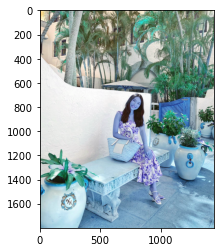

In [117]:
plt.imshow(images[30])

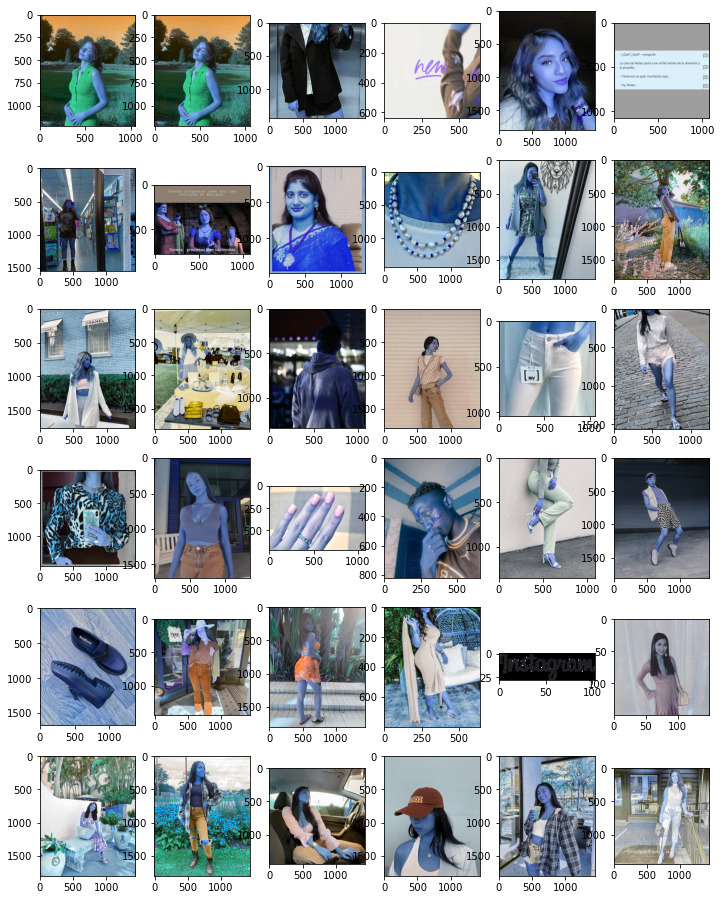

In [122]:
rows = 6
cols = 6
for i in range(0, len(images), rows*cols):
    fig = plt.figure(figsize=(12,16))
    for j in range(0, rows*cols):
        fig.add_subplot(rows, cols, j+1)
        plt.imshow(images[i+j])
    plt.show()

#### Images for *# fashiontrends2021*

In [123]:
file2 = r'C:\Users\yuvem\fashiontrends2021\*.jpg'
glob.glob(file2)

['C:\\Users\\yuvem\\fashiontrends2021\\fashiontrends20210.jpg',
 'C:\\Users\\yuvem\\fashiontrends2021\\fashiontrends20211.jpg',
 'C:\\Users\\yuvem\\fashiontrends2021\\fashiontrends202110.jpg',
 'C:\\Users\\yuvem\\fashiontrends2021\\fashiontrends202111.jpg',
 'C:\\Users\\yuvem\\fashiontrends2021\\fashiontrends202112.jpg',
 'C:\\Users\\yuvem\\fashiontrends2021\\fashiontrends202113.jpg',
 'C:\\Users\\yuvem\\fashiontrends2021\\fashiontrends202114.jpg',
 'C:\\Users\\yuvem\\fashiontrends2021\\fashiontrends202115.jpg',
 'C:\\Users\\yuvem\\fashiontrends2021\\fashiontrends202116.jpg',
 'C:\\Users\\yuvem\\fashiontrends2021\\fashiontrends202117.jpg',
 'C:\\Users\\yuvem\\fashiontrends2021\\fashiontrends202118.jpg',
 'C:\\Users\\yuvem\\fashiontrends2021\\fashiontrends202119.jpg',
 'C:\\Users\\yuvem\\fashiontrends2021\\fashiontrends20212.jpg',
 'C:\\Users\\yuvem\\fashiontrends2021\\fashiontrends202120.jpg',
 'C:\\Users\\yuvem\\fashiontrends2021\\fashiontrends202121.jpg',
 'C:\\Users\\yuvem\\fashiont

In [124]:
images = [cv2.imread(image) for image in glob.glob(file2)]

In [125]:
type(images)

list

In [126]:
len(images)

39

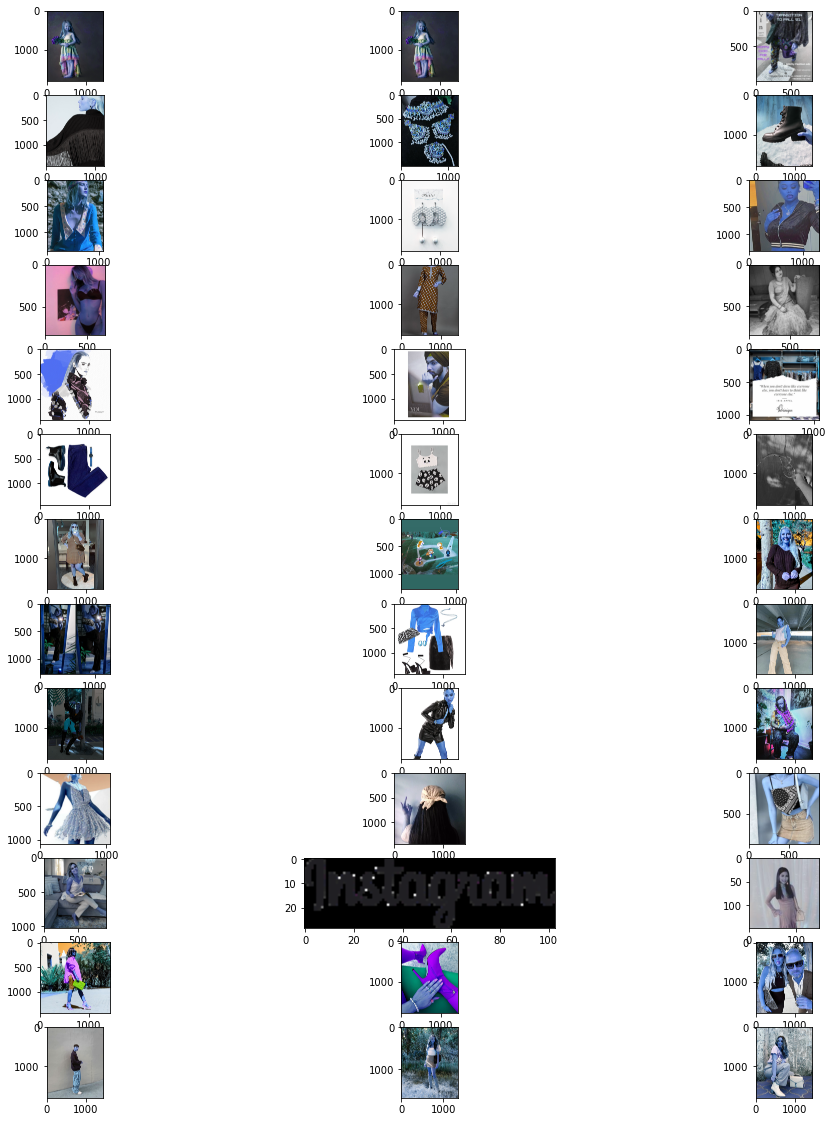

In [128]:
rows = 13
cols = 3
for i in range(0, len(images), rows*cols):
    fig = plt.figure(figsize=(18,20))
    for j in range(0, rows*cols):
        fig.add_subplot(rows, cols, j+1)
        plt.imshow(images[i+j])
    plt.show()